# 0.0 IMPORTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import inflection
import datetime
import math

from matplotlib import pyplot as plt
from IPython.display import Image

## 0.1. Loading data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_stores_raw = pd.read_csv('data/store.csv', low_memory=False)

In [3]:
# Juntar os Data Frames aplicando o merge
df_raw = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')

# 1.0. DESCREPTION DATA

In [4]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(lambda x: inflection.underscore(x), cols_old))

df1.columns = cols_new

## 1.2. Data dimensions

In [6]:
# Imprimindo o número de linhas
print('Number of Rows: {}'.format(df1.shape[0]))

# Imprimindo o número de colunas
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data types

In [7]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [8]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
# competition_distance              2642
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# competition_open_since_month    323348
df1['competition_open_since_month'] = df1[['date', 'competition_open_since_month']].apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year     323348
df1['competition_open_since_year'] = df1[['date', 'competition_open_since_year']].apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week               508031
df1['promo2_since_week'] = df1[['date', 'promo2_since_week']].apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year               508031
df1['promo2_since_year'] = df1[['date', 'promo2_since_year']].apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval                  508031
df1['promo_interval'].fillna(0, inplace=True)

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

## 1.6. Change types

In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)

df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)

df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Descriptive stastistical

In [12]:
num_attributes = df1.select_dtypes(include = ['int64', 'int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical attibutes

In [13]:
# Cntral - mean, median
ct1 =  pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - min, max, range, std, skews, kurtoss
d1 = pd.DataFrame(num_attributes.apply(min)).T
d2 = pd.DataFrame(num_attributes.apply(max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d1, d2, d3, ct1, ct2, d4, d5, d6]).T.reset_index()

# Renames columns
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skwes', 'kurtosis']

In [14]:
m

,attributes,min,max,range,mean,median,std,skwes,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


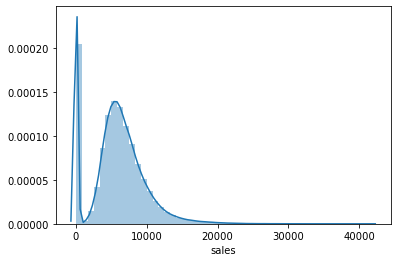

In [15]:
# Vamos entender um pouco esses resultados
# Como temos uma skew positiva, em sales teremos um deslocamento do gráfico para a esquerda.
sns.distplot(df1['sales'])

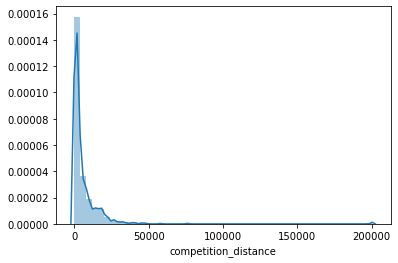

In [16]:
# Como temos uma skew positiva, em sales teremos um deslocamento do gráfico para a esquerda. A kurtosis é positiva e possui
# um valor muito grande, logo teremos um pico muito grande tambem. ('curva de poison')
sns.distplot(df1['competition_distance'])

### 1.7.1. Categorical attibutes

In [17]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

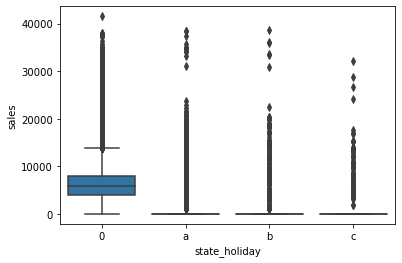

In [18]:
# Gerando um gráfico boxplot
sns.boxplot(x = 'state_holiday', y = 'sales', data = df1)

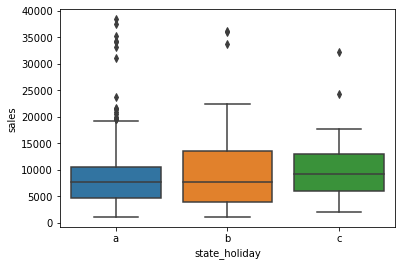

In [19]:
# Filtrando
aux1 = df1[(df1['state_holiday'] != '0') & df1['sales'] > 0]
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1)

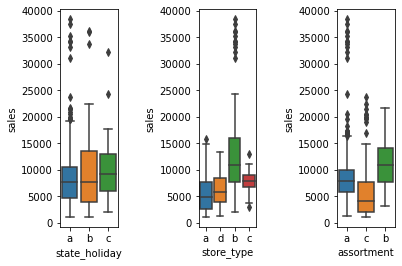

In [20]:
aux1 = df1[(df1['state_holiday'] != '0') & df1['sales'] > 0]
plt.subplot(1, 5, 1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1)

plt.subplot(1, 5, 3)
sns.boxplot(x = 'store_type', y = 'sales', data = aux1)

plt.subplot(1, 5, 5)
sns.boxplot(x = 'assortment', y = 'sales', data = aux1)

# 2.0. FEATURE ENGINEERING - PASSO 2

## 2.1. Mapa menta de hipóteses

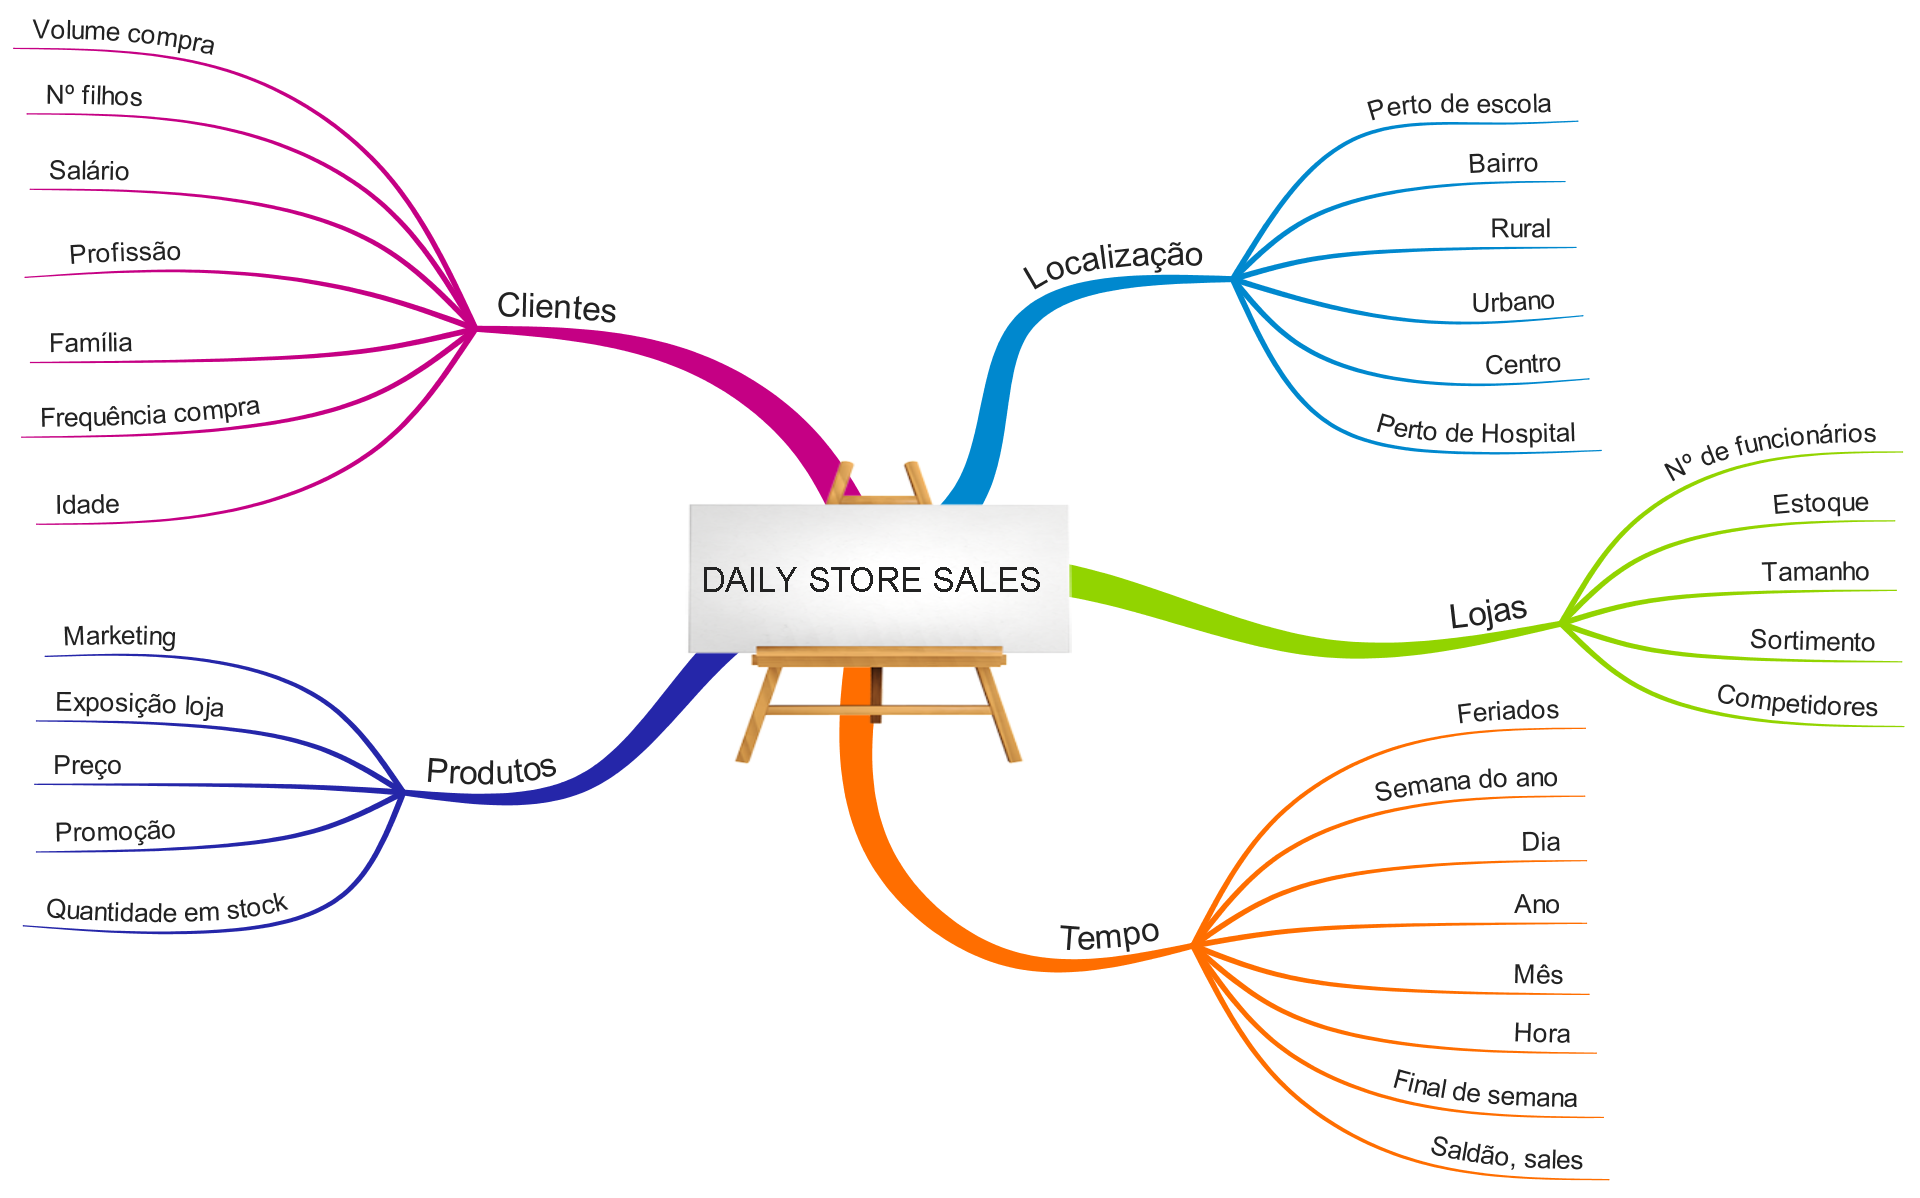

In [21]:
Image('img/DAILY_STORE_SALES.png')

## 2.2. Criação das hipóteses

### 2.2.1. Hipóteses Loja

**1.** Lojas com maior número de funcionários deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimento deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores a mais tempo deveriam vender mais.

### 2.2.2. Hipóteses Produtos

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas que expõe mais seu produto nas vetrines deveriam vender mais.

**3.** Lojas que têm preços menores deveriam vender mais.

**4.** Lojas preços menores por mais tempo deveriam vender mais.

**5.**  Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com promoções consecutivas deveriam vender mais.

### 2.2.1. Hipóteses Tempo (sazonalidade)

**1.** Lojas com mais feriados deveriam vender mais.

**2.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**3.** Lojas deveriam vender mais ao longo dos anos.

**4.** Lojas deveriam vender mais no segundo semestre do ano.

**5.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**6.** Lojas deveriam vender menos aos finais de semana.

**7.** Lojas deveriam vender menos durante os feriados esolares.

## 2.3. priorização - Lista final de hipóteses

**1.**  Lojas com maior sortimento deveriam vender mais.

**2.**  Lojas com competidores mais próximos deveriam vender menos.

**3.**  Lojas com competidores a mais tempo deveriam vender mais.

**4.**  Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.**  Lojas com mais dias de promoção deveriam vender mais.

**6.**  Lojas com promoções consecutivas deveriam vender mais.

**7.**  Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.**  Lojas deveriam vender mais ao longo dos anos.

**9.**  Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados esolares.

## 2.4. Feature engineering

In [22]:
df2 = df1.copy()

In [23]:
# Derivar as variáveis
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'], day=1 ), axis=1)

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w')
                                                - datetime.timedelta(days=7))

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' if x == 'c' else 'no_classification')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


In [30]:
df2.sample(10).T

,28063,770451,455072,719049,65582,660899,942340,557088,211169,829182
store,189,772,938,660,913,490,951,374,435,408
day_of_week,1,6,2,3,3,6,6,1,5,2
date,2015-07-06 00:00:00,2013-08-10 00:00:00,2014-05-20 00:00:00,2013-09-25 00:00:00,2015-06-03 00:00:00,2013-11-16 00:00:00,2013-03-09 00:00:00,2014-02-17 00:00:00,2015-01-23 00:00:00,2013-06-18 00:00:00
sales,7537,3023,10387,4323,11856,9542,6304,10380,2771,4778
customers,804,432,1001,530,1411,1201,598,1132,344,469
open,1,1,1,1,1,1,1,1,1,1
promo,0,0,1,1,1,0,0,1,0,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,0,0,0,0,0,0,0,0,0
store_type,d,d,a,a,a,a,d,a,a,c
